In [ ]:

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
from google.colab import drive


drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/archive/frames/frames' 
csv_path = '/content/drive/MyDrive/archive/labels.csv'          

df = pd.read_csv(csv_path)
print("CSV loaded:", df.shape)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV loaded: (2000, 2)
   id  count
0   1     35
1   2     41
2   3     41
3   4     44
4   5     41


In [ ]:
def find_image_file(img_folder, id_val):
    """Search for an image in folder that contains the ID in its filename."""
    for f in os.listdir(img_folder):
        if str(id_val).zfill(6) in f: 
            return os.path.join(img_folder, f)
    return None


In [ ]:
def mae_count(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))


In [ ]:
def mse_count(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

In [ ]:
def unet_count(input_size=(256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64,3,activation='relu',padding='same')(inputs)
    conv1 = Conv2D(64,3,activation='relu',padding='same')(conv1)
    pool1 = MaxPooling2D((2,2))(conv1)

    conv2 = Conv2D(128,3,activation='relu',padding='same')(pool1)
    conv2 = Conv2D(128,3,activation='relu',padding='same')(conv2)
    pool2 = MaxPooling2D((2,2))(conv2)

    conv3 = Conv2D(256,3,activation='relu',padding='same')(pool2)
    conv3 = Conv2D(256,3,activation='relu',padding='same')(conv3)
    pool3 = MaxPooling2D((2,2))(conv3)

    conv4 = Conv2D(512,3,activation='relu',padding='same')(pool3)
    conv4 = Conv2D(512,3,activation='relu',padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D((2,2))(drop4)

    conv5 = Conv2D(1024,3,activation='relu',padding='same')(pool4)
    conv5 = Conv2D(1024,3,activation='relu',padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    gap = GlobalAveragePooling2D()(drop5)
    outputs = Dense(1, activation='linear')(gap)
    model = Model(inputs, outputs)
    return model

Total images loaded: 2000
Train: 1200 Val: 400 Test: 400
Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 209.0050 - mae_count: 11.0455 - mse_count: 209.0050
Epoch 1: val_mae_count improved from inf to 15.10800, saving model to unet_count.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 125ms/step - loss: 208.6614 - mae_count: 11.0349 - mse_count: 208.6614 - val_loss: 278.5845 - val_mae_count: 15.1080 - val_mse_count: 278.5845 - learning_rate: 1.0000e-04
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 66.6631 - mae_count: 6.4479 - mse_count: 66.6631
Epoch 2: val_mae_count improved from 15.10800 to 14.03810, saving model to unet_count.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 72s 105ms/step - loss: 66.6382 - mae_count: 6.4469 - mse_count: 66.6382 - val_loss: 240.4862 - val_mae_count: 14.0381 - val_mse_count: 240.4862 - learning_rate: 1.0000e-04
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 41.4979 - mae_count: 5.0439 - mse_count: 41.4979
Epoch 3: val_mae_count did not improve from 14.03810
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - loss: 41.4967 - mae_count: 5.0439 - mse_count: 41.4967 - val_loss: 308.5625 - val_mae_count: 16.4027 - val_mse_count: 308.5625 - learning_rate: 1.0000e-04
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 34.1653 - mae_count: 4.6681 - mse_count: 34.1653
Epoch 4: val_mae_count did not improve from 14.03810
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 110ms/step - loss: 34.1638 - mae_count: 4.6680 - mse_count: 34.1638 - val_loss: 264.3911 - val_mae_count: 15.1674 - val_mse_count: 264.3911 - learning_rate: 1.0000e-04
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 29.4574 - 

300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 104ms/step - loss: 31.9275 - mae_count: 4.4604 - mse_count: 31.9275 - val_loss: 161.6668 - val_mae_count: 11.5389 - val_mse_count: 161.6668 - learning_rate: 1.0000e-04
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 28.9964 - mae_count: 4.3619 - mse_count: 28.9964
Epoch 7: val_mae_count did not improve from 11.53889
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - loss: 28.9944 - mae_count: 4.3616 - mse_count: 28.9944 - val_loss: 189.7749 - val_mae_count: 12.7191 - val_mse_count: 189.7749 - learning_rate: 1.0000e-04
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 21.1782 - mae_count: 3.7181 - mse_count: 21.1782
Epoch 8: val_mae_count did not improve from 11.53889
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - loss: 21.1768 - mae_count: 3.7180 - mse_count: 21.1768 - val_loss: 289.6466 - val_mae_count: 16.2198 - val_mse_count: 289.6466 - learning_rate: 1.0000e-04
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 23.2080 - 

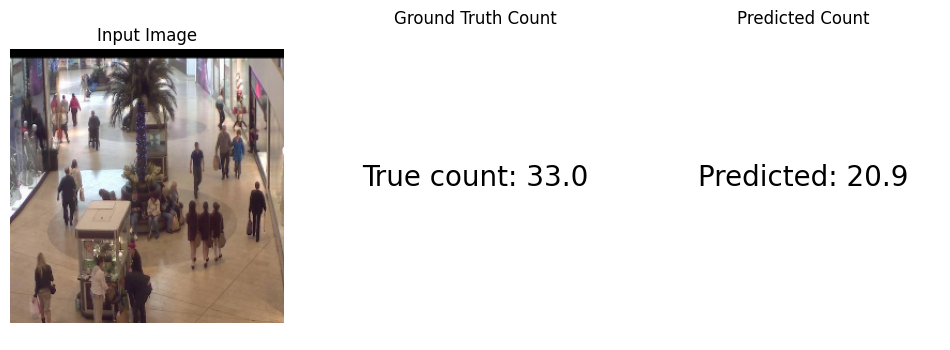

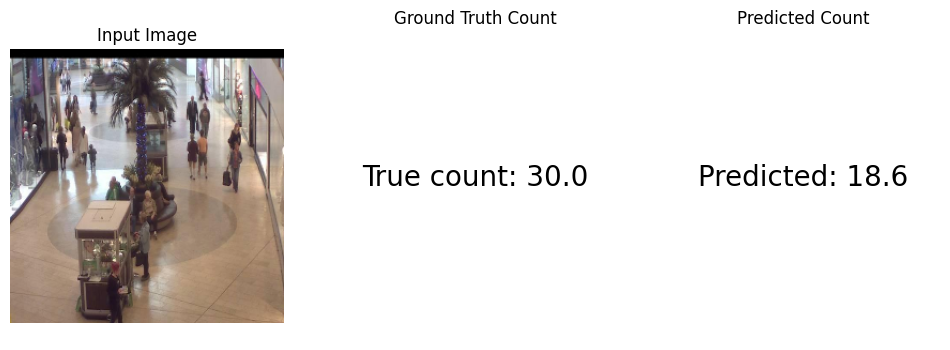

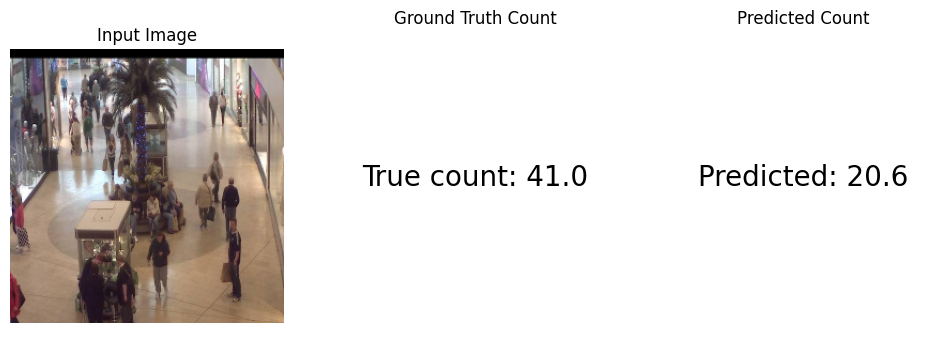

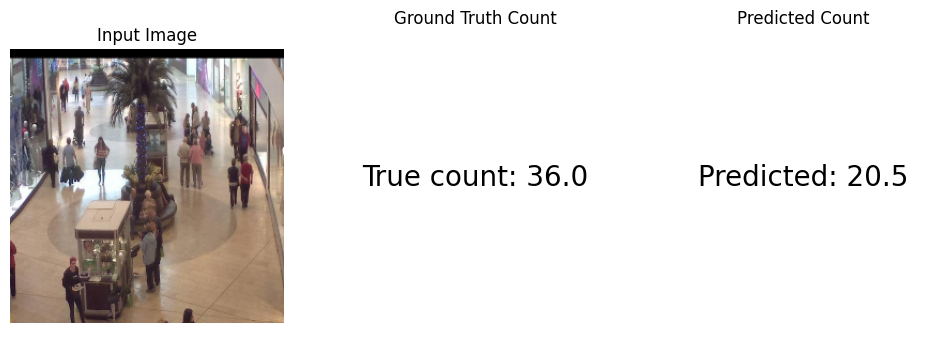

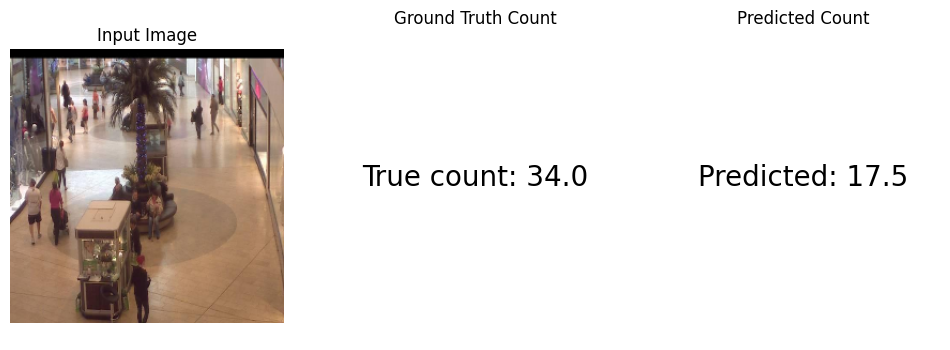

Model saved as 'unet_count_final.h5'


In [ ]:

IMG_SIZE = (256,256)
images, counts = [], []

for idx, row in df.iterrows():
    img_file = find_image_file(dataset_path, row['id'])
    if img_file is None:
        print("Warning: image not found for ID:", row['id'])
        continue
    img = cv2.imread(img_file)
    if img is None:
        print("Warning: could not read", img_file)
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, IMG_SIZE)
    images.append(img_resized)
    counts.append(row['count'])

images = np.array(images, dtype=np.float32) / 255.0
counts = np.array(counts, dtype=np.float32).reshape(-1,1)
print("Total images loaded:", len(images))

train_images, test_images, train_counts, test_counts = train_test_split(
    images, counts, test_size=0.2, random_state=42
)
train_images, val_images, train_counts, val_counts = train_test_split(
    train_images, train_counts, test_size=0.25, random_state=42
)
print("Train:", len(train_images), "Val:", len(val_images), "Test:", len(test_images))

unet = unet_count()
opt = Adam(1e-4)
unet.compile(optimizer=opt, loss='mse', metrics=[mae_count, mse_count])


checkpoint = ModelCheckpoint('unet_count.h5', monitor='val_mae_count', save_best_only=True, mode='min', verbose=1)
early_stop = EarlyStopping(monitor='val_mae_count', patience=10, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_mae_count', factor=0.1, patience=5, mode='min', verbose=1)


BATCH_SIZE = 4
EPOCHS = 10
history = unet.fit(
    train_images, train_counts,
    validation_data=(val_images, val_counts),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)


unet.load_weights('unet_count.h5')
results = unet.evaluate(test_images, test_counts, batch_size=BATCH_SIZE)
print("Test results (loss, MAE, MSE):", results)


def visualize_counts(images, counts, model, num_samples=5):
    idxs = np.random.choice(len(images), num_samples, replace=False)
    preds = model.predict(images[idxs])
    for i, idx in enumerate(idxs):
        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        plt.imshow(images[idx])
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.text(0.5, 0.5, f"True count: {counts[idx][0]}", fontsize=20, ha='center')
        plt.axis('off')
        plt.title("Ground Truth Count")

        plt.subplot(1,3,3)
        plt.text(0.5, 0.5, f"Predicted: {preds[i][0]:.1f}", fontsize=20, ha='center')
        plt.axis('off')
        plt.title("Predicted Count")

        plt.show()

visualize_counts(test_images, test_counts, unet, num_samples=5)

unet.save('unet_count_final.h5')
print("Model saved as 'unet_count_final.h5'")


In [ ]:
def mcnn_count(input_size=(256,256,3)):
    inputs = Input(input_size)

    col1 = Conv2D(16, (9, 9), activation='relu', padding='same')(inputs)
    col1 = MaxPooling2D((2, 2))(col1)
    col1 = Conv2D(32, (7, 7), activation='relu', padding='same')(col1)
    col1 = MaxPooling2D((2, 2))(col1)

    col2 = Conv2D(20, (7, 7), activation='relu', padding='same')(inputs)
    col2 = MaxPooling2D((2, 2))(col2)
    col2 = Conv2D(40, (5, 5), activation='relu', padding='same')(col2)
    col2 = MaxPooling2D((2, 2))(col2)

    col3 = Conv2D(24, (5, 5), activation='relu', padding='same')(inputs)
    col3 = MaxPooling2D((2, 2))(col3)
    col3 = Conv2D(48, (3, 3), activation='relu', padding='same')(col3)
    col3 = MaxPooling2D((2, 2))(col3)

    merged = concatenate([col1, col2, col3])

    conv1 = Conv2D(64, 3, activation='relu', padding='same')(merged)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)

    gap = GlobalAveragePooling2D()(conv1)
    outputs = Dense(1, activation='linear')(gap)

    model = Model(inputs, outputs)
    return model

In [ ]:

def visualize_mcnn_counts(images, counts, model, num_samples=5):
    idxs = np.random.choice(len(images), num_samples, replace=False)
    preds = model.predict(images[idxs])
    for i, idx in enumerate(idxs):
        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        plt.imshow(images[idx])
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.text(0.5, 0.5, f"True count: {counts[idx][0]}", fontsize=20, ha='center')
        plt.axis('off')
        plt.title("Ground Truth Count")

        plt.subplot(1,3,3)
        plt.text(0.5, 0.5, f"Predicted: {preds[i][0]:.1f}", fontsize=20, ha='center')
        plt.axis('off')
        plt.title("MCNN Predicted Count")

        plt.show()

In [ ]:
def plot_comparison_history(unet_history, mcnn_history):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.plot(unet_history.history['loss'], label='U-Net Training Loss')
    plt.plot(unet_history.history['val_loss'], label='U-Net Validation Loss')
    plt.plot(mcnn_history.history['loss'], label='MCNN Training Loss')
    plt.plot(mcnn_history.history['val_loss'], label='MCNN Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(unet_history.history['mae_count'], label='U-Net Training MAE')
    plt.plot(unet_history.history['val_mae_count'], label='U-Net Validation MAE')
    plt.plot(mcnn_history.history['mae_count'], label='MCNN Training MAE')
    plt.plot(mcnn_history.history['val_mae_count'], label='MCNN Validation MAE')
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(unet_history.history['mse_count'], label='U-Net Training MSE')
    plt.plot(unet_history.history['val_mse_count'], label='U-Net Validation MSE')
    plt.plot(mcnn_history.history['mse_count'], label='MCNN Training MSE')
    plt.plot(mcnn_history.history['val_mse_count'], label='MCNN Validation MSE')
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(2, 2, 4)
    models = ['U-Net', 'MCNN']
    mae_vals = [results[1], mcnn_results[1]]
    mse_vals = [results[2], mcnn_results[2]]

    x = np.arange(len(models))
    width = 0.35

    plt.bar(x - width/2, mae_vals, width, label='MAE')
    plt.bar(x + width/2, mse_vals, width, label='MSE')

    plt.xlabel('Model')
    plt.ylabel('Error')
    plt.title('Final Test Metrics Comparison')
    plt.xticks(x, models)
    plt.legend()

    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300)
    plt.show()


In [ ]:
def visualize_comparison(images, counts, unet_model, mcnn_model, num_samples=3):
    idxs = np.random.choice(len(images), num_samples, replace=False)
    unet_preds = unet_model.predict(images[idxs])
    mcnn_preds = mcnn_model.predict(images[idxs])

    for i, idx in enumerate(idxs):
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 4, 1)
        plt.imshow(images[idx])
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(1, 4, 2)
        plt.text(0.5, 0.5, f"True: {counts[idx][0]}", fontsize=16, ha='center')
        plt.axis('off')
        plt.title("Ground Truth")

        plt.subplot(1, 4, 3)
        plt.text(0.5, 0.5, f"U-Net: {unet_preds[i][0]:.1f}", fontsize=16, ha='center')
        plt.axis('off')
        plt.title("U-Net Prediction")

        plt.subplot(1, 4, 4)
        plt.text(0.5, 0.5, f"MCNN: {mcnn_preds[i][0]:.1f}", fontsize=16, ha='center')
        plt.axis('off')
        plt.title("MCNN Prediction")

        plt.tight_layout()
        plt.savefig(f'comparison_sample_{i+1}.png', dpi=300)
        plt.show()


Training MCNN model...
Epoch 1/10
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 387.3701 - mae_count: 15.2139 - mse_count: 387.3701
Epoch 1: val_mae_count improved from inf to 6.32498, saving model to mcnn_count.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 385.8696 - mae_count: 15.1729 - mse_count: 385.8696 - val_loss: 60.7193 - val_mae_count: 6.3250 - val_mse_count: 60.7193 - learning_rate: 1.0000e-04
Epoch 2/10
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 57.1976 - mae_count: 5.9994 - mse_count: 57.1976
Epoch 2: val_mae_count did not improve from 6.32498
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 57.1979 - mae_count: 5.9996 - mse_count: 57.1979 - val_loss: 66.9617 - val_mae_count: 6.5342 - val_mse_count: 66.9617 - learning_rate: 1.0000e-04
Epoch 3/10
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 59.0414 - mae_count: 6.1187 - mse_count: 59.0414
Epoch 3: val_mae_count did not improve from 6.32498
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 59.0173 - mae_count: 6.1173 - mse_count: 59.0173 - val_loss: 61.9386 - val_mae_count: 6.4377 - val_mse_count: 61.9386 - learning_rate: 1.0000e-04
Epoch 4/10
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 56.3830 - mae_count: 

300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 56.3784 - mae_count: 6.0025 - mse_count: 56.3784 - val_loss: 56.1012 - val_mae_count: 5.9969 - val_mse_count: 56.1012 - learning_rate: 1.0000e-04
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 55.5035 - mae_count: 5.9536 - mse_count: 55.5035
Epoch 5: val_mae_count did not improve from 5.99690
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 55.4986 - mae_count: 5.9533 - mse_count: 55.4986 - val_loss: 56.4290 - val_mae_count: 6.1314 - val_mse_count: 56.4290 - learning_rate: 1.0000e-04
Epoch 6/10
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 56.3230 - mae_count: 5.9572 - mse_count: 56.3230
Epoch 6: val_mae_count improved from 5.99690 to 5.67368, saving model to mcnn_count.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 56.2836 - mae_count: 5.9552 - mse_count: 56.2836 - val_loss: 49.9601 - val_mae_count: 5.6737 - val_mse_count: 49.9601 - learning_rate: 1.0000e-04
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 48.1654 - mae_count: 5.5087 - mse_count: 48.1654
Epoch 7: val_mae_count improved from 5.67368 to 5.65288, saving model to mcnn_count.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 48.1640 - mae_count: 5.5086 - mse_count: 48.1640 - val_loss: 49.8414 - val_mae_count: 5.6529 - val_mse_count: 49.8414 - learning_rate: 1.0000e-04
Epoch 8/10
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 44.4853 - mae_count: 5.2250 - mse_count: 44.4853
Epoch 8: val_mae_count improved from 5.65288 to 5.46062, saving model to mcnn_count.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 44.4757 - mae_count: 5.2249 - mse_count: 44.4757 - val_loss: 46.3078 - val_mae_count: 5.4606 - val_mse_count: 46.3078 - learning_rate: 1.0000e-04
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 42.2559 - mae_count: 5.1125 - mse_count: 42.2559
Epoch 9: val_mae_count improved from 5.46062 to 4.94489, saving model to mcnn_count.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 42.2454 - mae_count: 5.1120 - mse_count: 42.2454 - val_loss: 37.7639 - val_mae_count: 4.9449 - val_mse_count: 37.7639 - learning_rate: 1.0000e-04
Epoch 10/10
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 38.2527 - mae_count: 4.9655 - mse_count: 38.2527
Epoch 10: val_mae_count improved from 4.94489 to 4.53039, saving model to mcnn_count.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 38.2367 - mae_count: 4.9642 - mse_count: 38.2367 - val_loss: 31.8738 - val_mae_count: 4.5304 - val_mse_count: 31.8738 - learning_rate: 1.0000e-04
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 32.5770 - mae_count: 4.6333 - mse_count: 32.5770
MCNN Test results (loss, MAE, MSE): [32.337196350097656, 4.617238998413086, 32.337196350097656]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


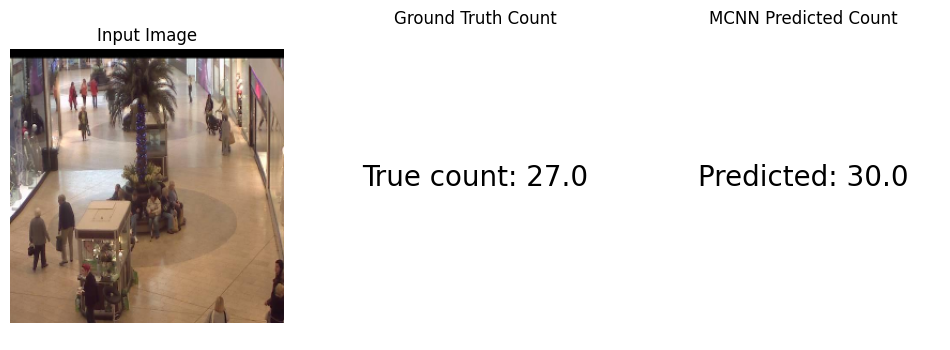

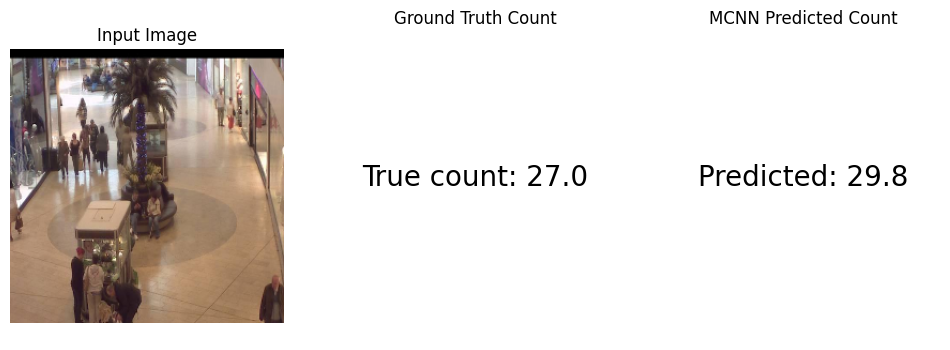

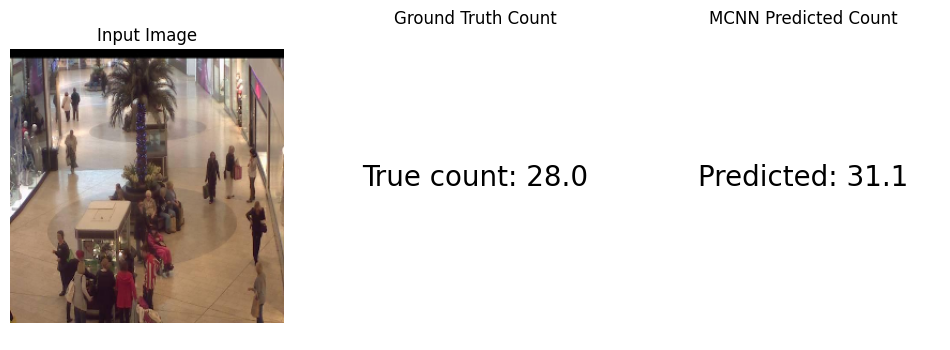

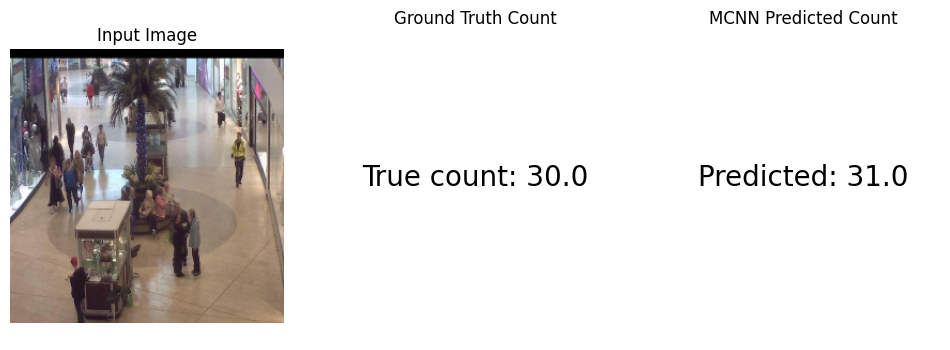

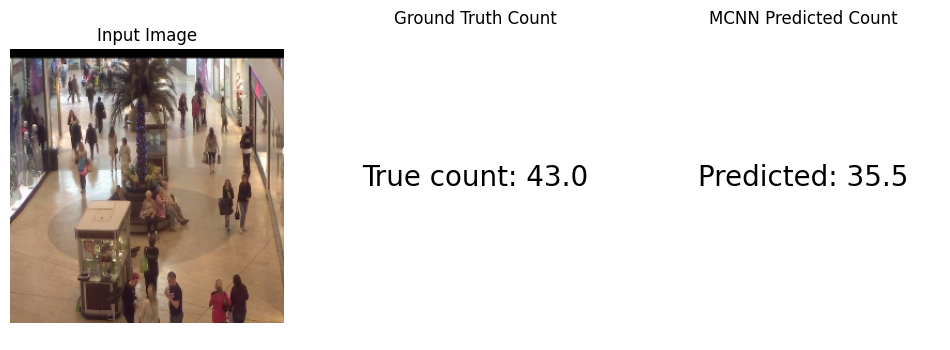

MCNN model saved as 'mcnn_count_final.h5'

Model Comparison:
Model      MAE        MSE       
------------------------------
U-Net      11.5409    162.0738  
MCNN       4.6172     32.3372   

U-Net shows -149.95% lower MAE and -401.20% lower MSE compared to MCNN.


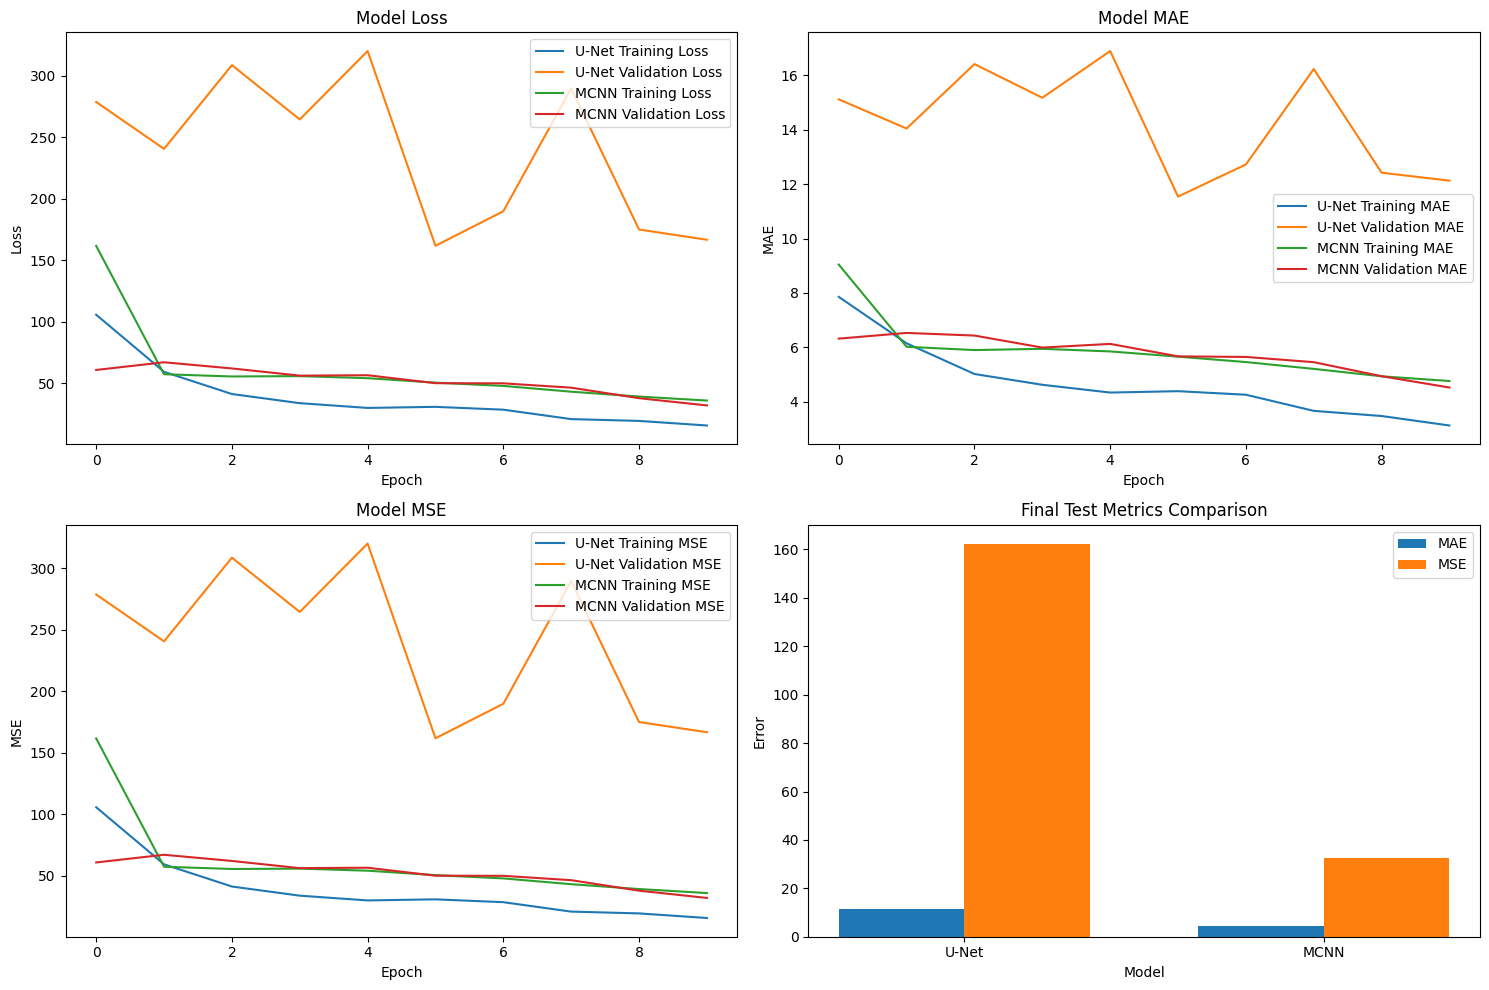

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


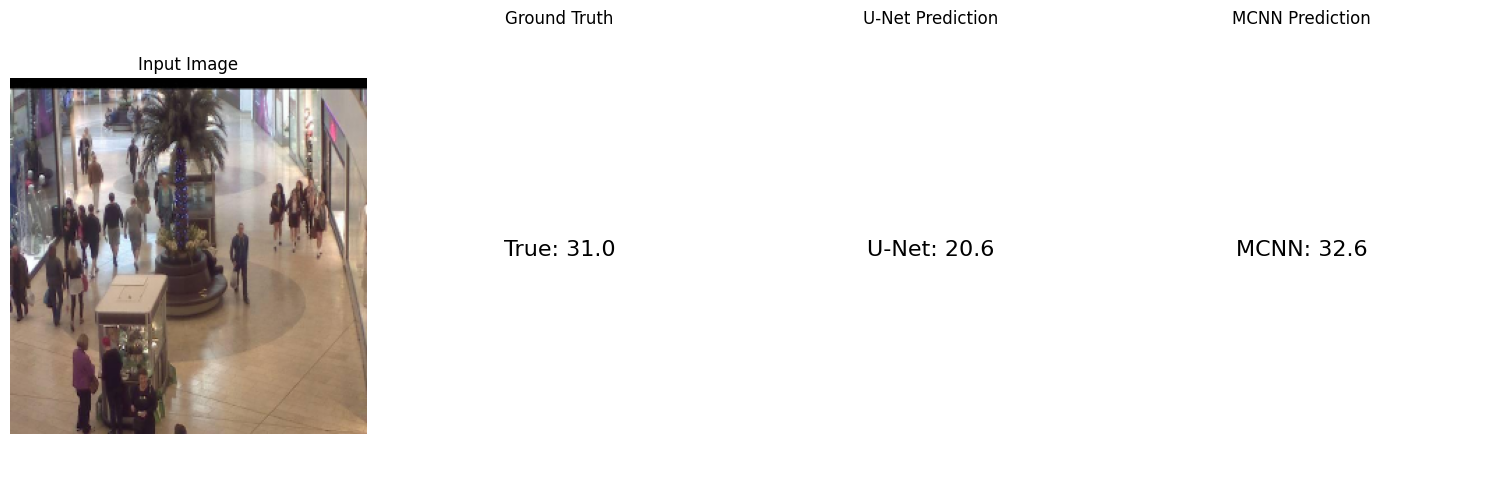

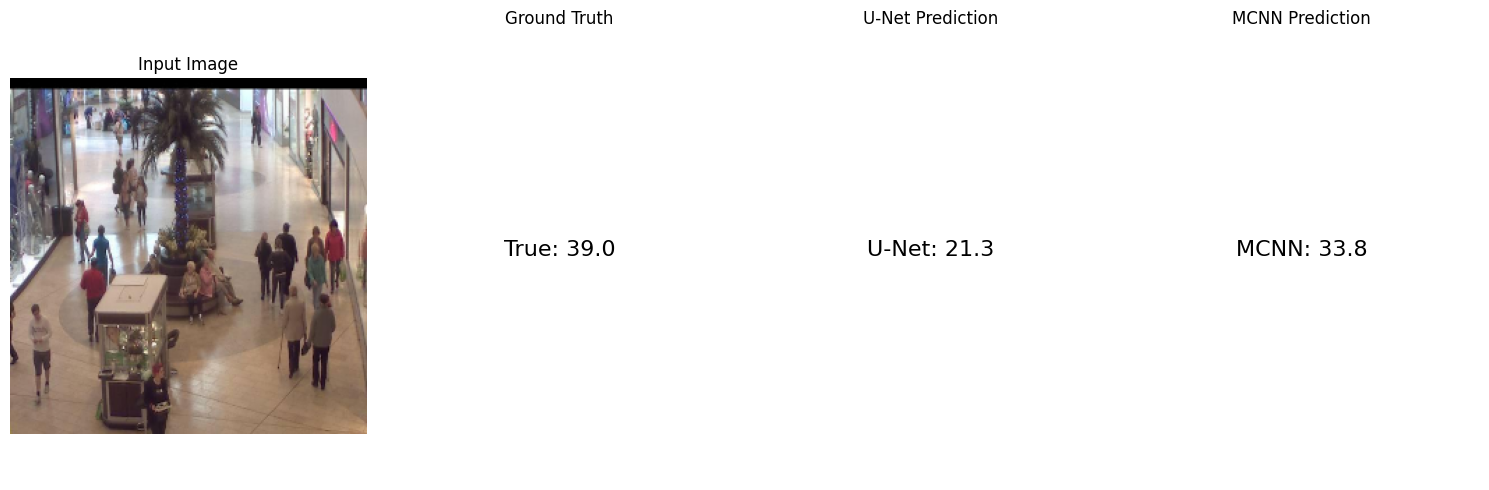

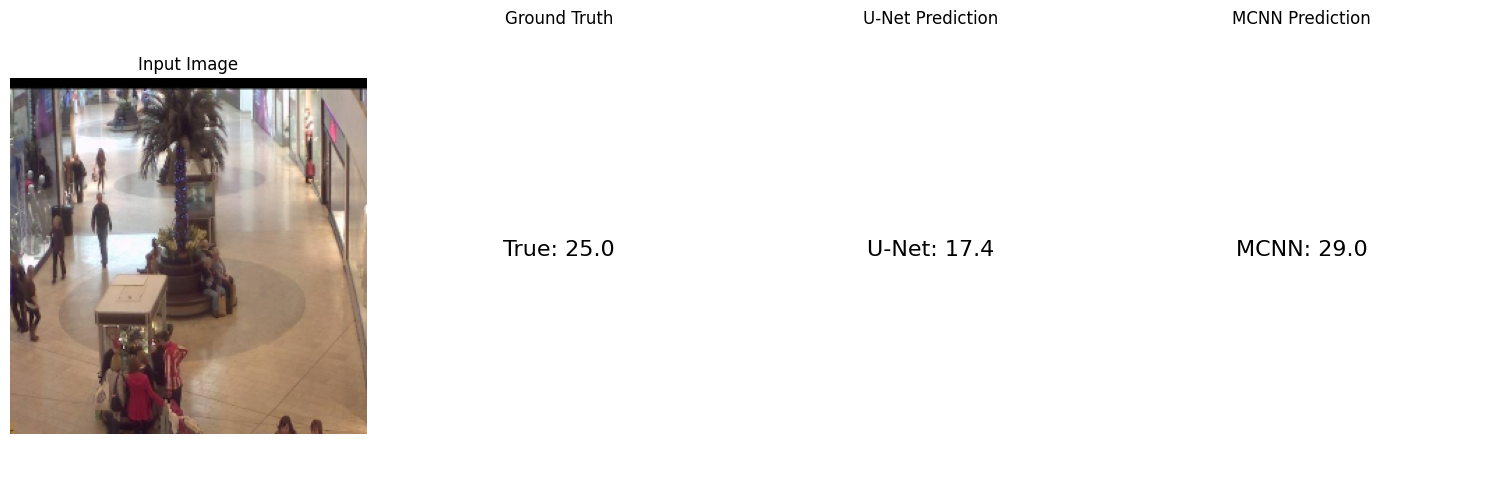


Comparison results saved to 'model_comparison_results.csv'
   Model        MAE         MSE  MAE_Improvement  MSE_Improvement
0  U-Net  11.540881  162.073776         0.000000         0.000000
1   MCNN   4.617239   32.337196      -149.951999      -401.199221

Training and evaluation complete!


In [ ]:

mcnn = mcnn_count()
mcnn.compile(optimizer=Adam(1e-4), loss='mse', metrics=[mae_count, mse_count])

mcnn_checkpoint = ModelCheckpoint('mcnn_count.h5', monitor='val_mae_count', save_best_only=True, mode='min', verbose=1)
mcnn_early_stop = EarlyStopping(monitor='val_mae_count', patience=10, mode='min', verbose=1)
mcnn_reduce_lr = ReduceLROnPlateau(monitor='val_mae_count', factor=0.1, patience=5, mode='min', verbose=1)


print("\nTraining MCNN model...")
mcnn_history = mcnn.fit(
    train_images, train_counts,
    validation_data=(val_images, val_counts),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[mcnn_checkpoint, mcnn_early_stop, mcnn_reduce_lr],
    verbose=1
)


mcnn.load_weights('mcnn_count.h5')
mcnn_results = mcnn.evaluate(test_images, test_counts, batch_size=BATCH_SIZE)
print("MCNN Test results (loss, MAE, MSE):", mcnn_results)



visualize_mcnn_counts(test_images, test_counts, mcnn, num_samples=5)

mcnn.save('mcnn_count_final.h5')
print("MCNN model saved as 'mcnn_count_final.h5'")

print("\nModel Comparison:")
print(f"{'Model':<10} {'MAE':<10} {'MSE':<10}")
print("-" * 30)
print(f"{'U-Net':<10} {results[1]:<10.4f} {results[2]:<10.4f}")
print(f"{'MCNN':<10} {mcnn_results[1]:<10.4f} {mcnn_results[2]:<10.4f}")

# Calculate percentage improvement
mae_improvement = (mcnn_results[1] - results[1]) / mcnn_results[1] * 100
mse_improvement = (mcnn_results[2] - results[2]) / mcnn_results[2] * 100

print(f"\nU-Net shows {mae_improvement:.2f}% lower MAE and {mse_improvement:.2f}% lower MSE compared to MCNN.")

plot_comparison_history(history, mcnn_history)

visualize_comparison(test_images, test_counts, unet, mcnn, num_samples=3)

results_df = pd.DataFrame({
    'Model': ['U-Net', 'MCNN'],
    'MAE': [results[1], mcnn_results[1]],
    'MSE': [results[2], mcnn_results[2]],
    'MAE_Improvement': [0, mae_improvement],
    'MSE_Improvement': [0, mse_improvement]
})

results_df.to_csv('model_comparison_results.csv', index=False)
print("\nComparison results saved to 'model_comparison_results.csv'")
print(results_df)

print("\nTraining and evaluation complete!")